In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))                                                                               # np.unique()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# We can use NumPy's bincount function, which counts the number of occurrences of each value in an array,
print('Labels counts in y:', np.bincount(y))                                                                    # np.bincount(y)
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# Many machine learning and optimization algorithms also require feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # Using the fit method, StandardScaler estimated the parameters μ (sample mean) and σ (standard deviation) 

# Using the Transform method, we then standardized the training data using those estimated parameters μ and σ
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Most algorithms in scikit-learn already support multiclass classification by default via the One-versus-Rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once.

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, max_iter=1000, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Misclassified samples: 1
Accuracy: 0.98
Accuracy: 0.98


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[1:len(np.unique(y))])                                                          # ListedColormap
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))         # np.meshgrid
                                                                                                                  # np.arange
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)                                                # xx1.ravel()
    Z = Z.reshape(xx1.shape)                                                                                      # np.array
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)                                                              # plt.contourf
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
        
    for idx, cl in enumerate(np.unique(y)):        
        # print(idx,cl)
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
    
    if test_idx:                                                                                                   # plt.scatter
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],c='',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100,label='testset')                                  
    

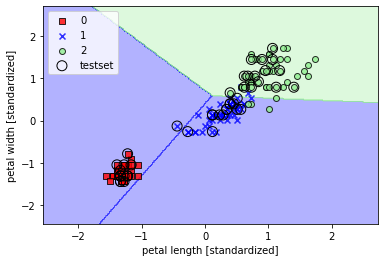

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))                                                                # np.vstack
y_combined = np.hstack((y_train, y_test))                                                                            # np.hstack
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

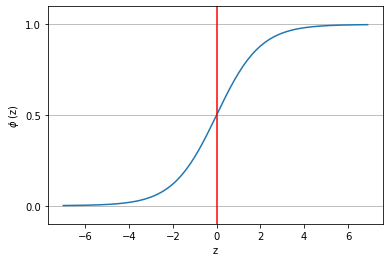

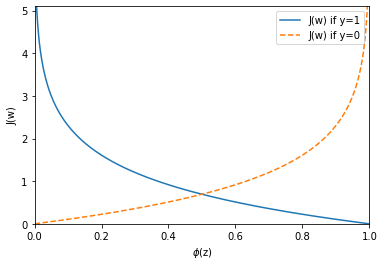

In [9]:
import matplotlib.pyplot as plt

def sigmoid(z): return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='r')                                                                                     # plt.axvline
plt.ylim(-0.1, 1.1)                                                                                             # plt.ylim
plt.xlabel('z')                                                                                                 # plt.xlabel
plt.ylabel('$\phi$ (z)')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])                                                                                     # plt.yticks
ax = plt.gca()                                                                                                  # plt.gca()
ax.yaxis.grid(True)                                                                                             # ax.yaxis.grid
plt.show()

def cost_1(z):    return - np.log(sigmoid(z))
def cost_0(z):    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1),plt.xlim([0, 1]),plt.xlabel('$\phi$(z)'),plt.ylabel('J(w)'),plt.legend(loc='best')

plt.show()

# Logistic Regression Model without scikitlearn

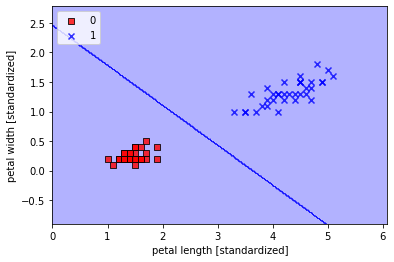

In [10]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    def net_input(self, X):      return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):     return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):        return np.where(self.net_input(X) >= 0.0, 1, 0)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

When we fit a logistic regression model, we have to keep in mind that it only works for binary classification tasks. So, let us consider only Iris-setosa and Irisversicolor flowers (classes 0 and 1) and check that our implementation of logistic regression works

# Logistic Regression Model with Scikitlearn

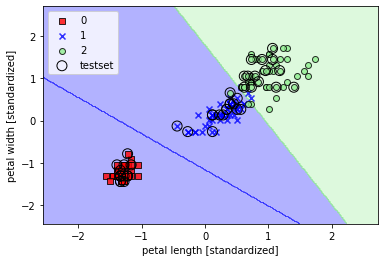

array([2, 0, 0])

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# lr.predict_proba(X_test_std[:3, :])
lr.predict(X_test_std[:3, :])
# lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

# lr.predict(X_test_std[0, :].reshape(1, -1))
lr.accuracy_score()

### Tackling Overfitting via Regularization
One way of finding a good bias-variance tradeoff is to tune the complexity of the
model via regularization. Regularization is a very useful method to handle
collinearity (high correlation among features), filter out noise from data, and
eventually prevent overfitting. The concept behind regularization is to introduce
additional information (bias) to penalize extreme parameter (weight) values. The
most common form of regularization is so-called L2 regularization (sometimes also
called L2 shrinkage or weight decay),

10^-5 Accuracy: 0.667
10^-4 Accuracy: 0.667
10^-3 Accuracy: 0.667
10^-2 Accuracy: 0.778
10^-1 Accuracy: 1.000
10^0 Accuracy: 0.978
10^1 Accuracy: 0.978
10^2 Accuracy: 0.978
10^3 Accuracy: 0.978
10^4 Accuracy: 0.978


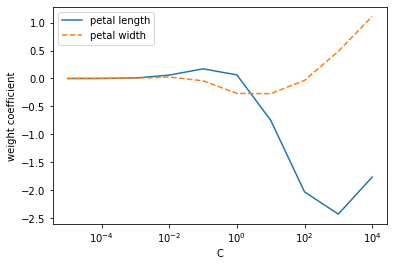

(Text(17.200000000000003, 0.5, 'weight coefficient'),
 Text(0.5, 17.200000000000003, 'C'),
 None,
 None)

In [43]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    y_pred = lr.predict(X_test_std)
    print("10^%d Accuracy: %0.3f" % (c, accuracy_score(y_test, y_pred)))

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient'),plt.xlabel('C'),plt.legend(loc='upper left'),plt.xscale('log'),plt.show()

Accuracy Score : 0.978


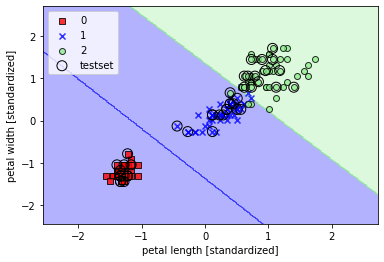

(Text(0.5, 17.200000000000003, 'petal length [standardized]'),
 Text(17.200000000000003, 0.5, 'petal width [standardized]'),
 None)

In [50]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
y_pred=svm.predict(X_test_std)
print("Accuracy Score : %0.3f" % accuracy_score(y_test, y_pred))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]'),plt.ylabel('petal width [standardized]'),plt.legend(loc='upper left'),plt.show()

In [52]:
# We could initialize the stochastic gradient descent version of the Perceptron, logistic Regression & SVM as:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge')  # loss='perceptron', 'log'
sgd =svm.fit(X_train_std, y_train)
y_pred=sgd.predict(X_test_std)
print("Accuracy Score : %0.3f" % accuracy_score(y_test, y_pred))

Accuracy Score : 0.978


### Kernel methods for linearly inseparable data : XOR Problem

(Text(0.5, 0, 'petal length [standardized]'),
 Text(0, 0.5, 'petal width [standardized]'),
 <matplotlib.legend.Legend at 0x1f69dbe3088>)

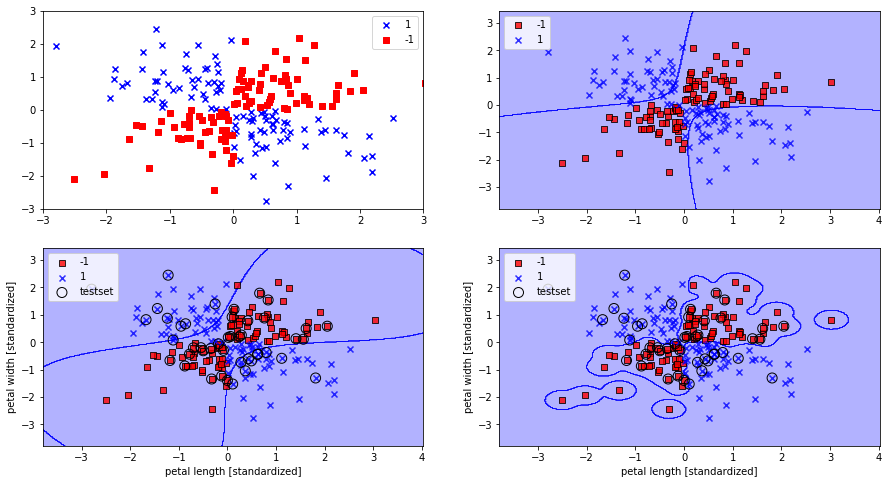

In [68]:
import matplotlib.pyplot as plt

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

svm  = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0).fit(X_xor, y_xor)
svm1 = SVC(kernel='rbf', random_state=1, gamma=0.2,  C=1.0 ).fit(X_xor, y_xor)
svm2 = SVC(kernel='rbf', random_state=1, gamma=20.5, C=1.0 ).fit(X_xor, y_xor)

# ******************PLOTS**********************************************************
plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
plt.subplot(221)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3]), plt.ylim([-3, 3]), plt.legend(loc='best')
plt.subplot(222)
plot_decision_regions(X_xor, y_xor, classifier=svm), plt.legend(loc='upper left')
plt.subplot(223)
plot_decision_regions(X_xor, y_xor, classifier=svm1, test_idx=range(105,150))
plt.xlabel('petal length [standardized]'),plt.ylabel('petal width [standardized]'),plt.legend(loc='upper left')
plt.subplot(224)
plot_decision_regions(X_xor, y_xor, classifier=svm2, test_idx=range(105,150))
plt.xlabel('petal length [standardized]'),plt.ylabel('petal width [standardized]'),plt.legend(loc='upper left')

# Decision Tree Learning

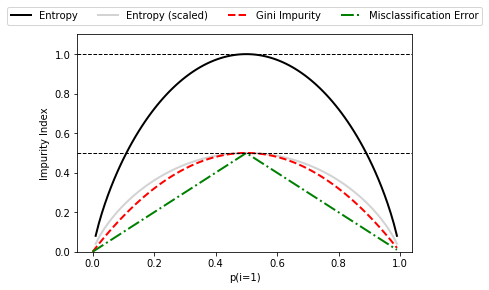

In [48]:
def gini(p):       return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):      return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy (scaled)','Gini Impurity','Misclassification Error'],
                        ['-', '-', '--', '-.'],
                        ['black', 'lightgray','red', 'green', 'cyan']):
                        line = ax.plot(x, i, label=lab,linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

Accuracy Score: 0.978


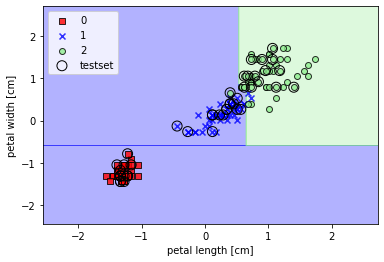

In [75]:
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train_std, y_train)
y_pred=tree.predict(X_test_std)
print('Accuracy Score: %0.3f' %accuracy_score(y_test,y_pred))

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

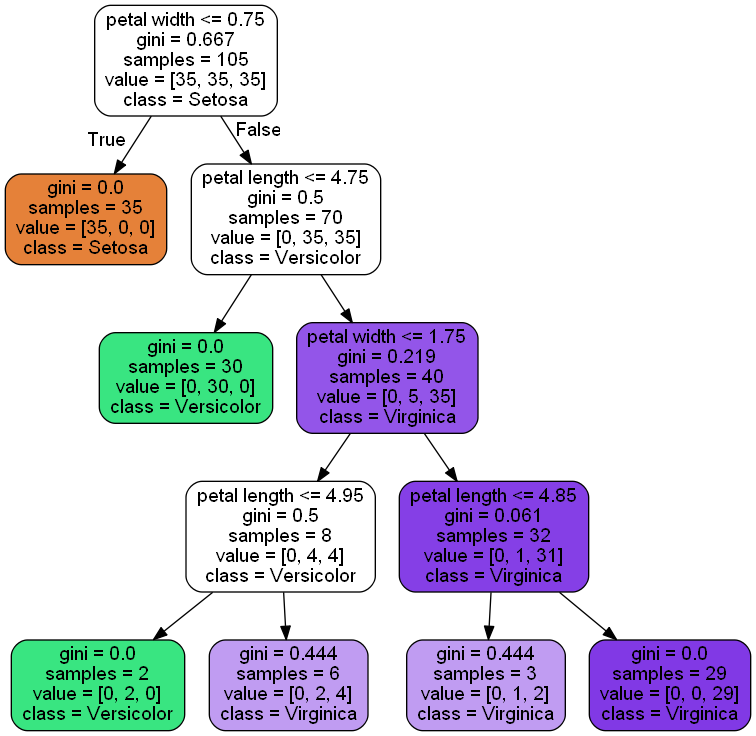

In [51]:
dot_data = export_graphviz(tree, filled=True, rounded=True, 
                           class_names=['Setosa','Versicolor','Virginica'], 
                           feature_names=['petal length','petal width'], 
                           out_file=None)

graph = graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png()) # graph.write_png('tree.png')

# Combining multiple decision trees via random forests

Accuracy Score: 0.978


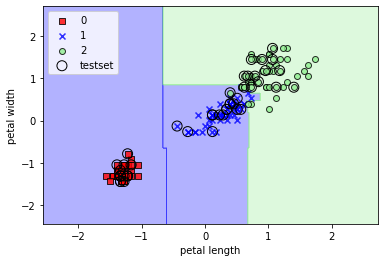

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred=forest.predict(X_test_std)
print('Accuracy Score: %0.3f' %accuracy_score(y_test,y_pred))

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

 # K-nearest neighbors – a lazy learning algorithm

Accuracy Score: 1.000


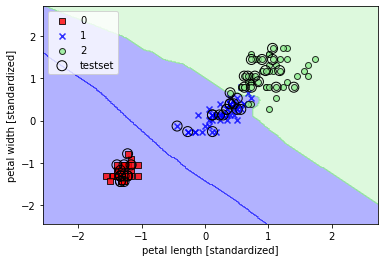

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred=knn.predict(X_test_std)
print('Accuracy Score: %0.3f' %accuracy_score(y_test,y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()